In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


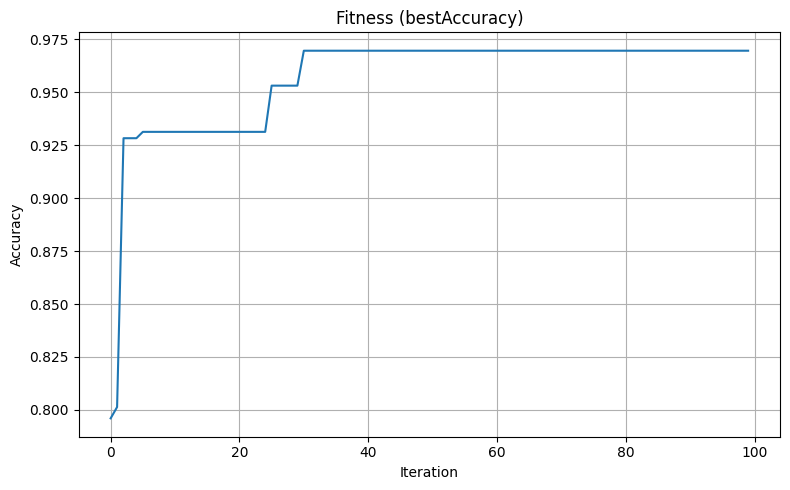

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
import random

# Load dataset
dataset = fetch_openml("letter", version=1, as_frame=True)
X = dataset.data
y = dataset.target

# Encode labels to numeric
y = LabelEncoder().fit_transform(y)

results = []
convergence_history = {}

# Optimization function (random search for simplicity)
def optimize_svm(X_train, y_train, X_test, y_test, iterations=100):
    best_acc = 0
    best_params = {}
    history = []
    
    for i in range(iterations):
        kernel = random.choice(['linear', 'poly', 'rbf', 'sigmoid'])
        nu = round(random.uniform(0.01, 0.5), 2)
        gamma = "scale"  # fixed for stability

        try:
            clf = NuSVC(kernel=kernel, nu=nu, gamma=gamma)
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)
            acc = accuracy_score(y_test, preds)
        except:
            acc = 0

        if acc > best_acc:
            best_acc = acc
            best_params = {"kernel": kernel, "nu": nu}
        history.append(best_acc)

    return best_acc, best_params, history

# Run for 10 samples
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    acc, params, hist = optimize_svm(X_train, y_train, X_test, y_test)
    convergence_history[f"S{i+1}"] = hist
    results.append({
        "Sample #": f"S{i+1}",
        "Best Accuracy": round(acc * 100, 2),
        "Best SVM Parameters (Kernel, Nu, Epsilon)": f"{params['kernel']}, {params['nu']}, N/A"
    })

# Save results to CSV
df = pd.DataFrame(results)
df.to_csv("optimized_svm_results.csv", index=False)

# Find sample with best accuracy
best_sample_index = df["Best Accuracy"].idxmax()
best_sample_key = df.iloc[best_sample_index]["Sample #"]

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(convergence_history[best_sample_key])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Fitness (bestAccuracy)")
plt.grid(True)
plt.tight_layout()
plt.savefig("convergence_plot.png")
plt.show()
